#### extración del primer dataset

In [335]:
# Importamos todas las librerías 
# [Import libraries]
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

In [336]:
# Leemos y hacemos una copia del dataset provisto por el Project Manager 
# [Read and make a copy of the dataset provide by our Project Manager]
flight_accident = pd.read_csv('AccidentesAviones.csv', delimiter=",")

## Análisis exploratorio de datos (EDA) - [Exploratory Data Analysis]

### Veamos cómo se compone el dataset - [Let´s see the data in our dataset]

In [337]:
#Tomamos algunos datos sin orden para ver como se compone. No elegimos .head() porque estan ordenados por fecha
# [We chose some samples to see the data. I didn't use .head() because is order by date, so could misslead the information]
flight_accident.sample(5)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
2733,2733,"February 02, 1974",2130,"Near Honolulu, HI",Pan American World Airways,?,"San Francisco, CA - Honolulu, HI - Agana, Guam",Boeing B-747,N732PA,19638/3,298,279,19,1,1,0,0,A 16 month old child was asphyxiated by a seat...
3359,3359,"November 21, 1985",?,"Near Sibyak, Indonesia",Military - Indonesian Air Force,?,?,Lockheed C-130H Hercules,A-1322,4898,11,0,11,11,0,11,0,Crashed into Mt. Sibayak.
4056,4056,"November 07, 1996",0929,"Aubusson, France",Jetcom S.A.,?,Geneva - Bordeaux,Cessna 421C Golden Eagle,HB-LRX,421C02172,8,7,1,8,7,1,0,The pilot reported that an engine failed just ...
2547,2547,"June 17, 1971",1430,"Near Arica, Chile",SAVCO,?,Santa Cruz - Arica,Douglas DC-6,CP-926,43043/83,6,4,2,6,4,2,0,The aircraft struck Putre Mountain at an altit...
2378,2378,"December 26, 1968",0615,"Elmendorf Air Force Base, Alaska",Pan American World Airways,?,"San Francisco - Anchorage - Cam Ranh Bay, Vietnam",Boeing 707-321CF,N799PA,?,3,0,3,3,0,3,0,The stickshaker sounded shortly after VR. The ...


In [338]:
# Vamos a eliminar la columna 'Unnamed' ya que parece que se hizo una duplicidad del índice
# [The column ''Unnamed:0' seems to be an error. We take it out]
flight_accident.drop(['Unnamed: 0'], axis=1, inplace=True)

In [339]:
#[Check de dataset]
flight_accident

,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."


### Veamos los valores nulos [Let's check the null/na values]

In [340]:
#Como los valores nulos tienen un signo de pregunta los vamos a remplazar con NaN para trabajarlo fácilmente
#[replace '?' with NaN to easy manipulate data]
flight_accident = flight_accident.replace('?', np.NaN)

In [341]:
# Veo % de nulos en todo el dataset
# Let's see % null/na on our dataset
na_ratio = ((flight_accident.isnull().sum() / len(flight_accident))*100).sort_values(ascending = False)
print(na_ratio)

flight_no                 73.522364
HORA declarada            30.031949
route                     15.215655
cn_ln                     13.318690
registration               5.431310
crew_fatalities            4.692492
passenger_fatalities       4.692492
PASAJEROS A BORDO          4.412939
crew_aboard                4.373003
summary                    1.178115
ground                     0.878594
all_aboard                 0.339457
ac_type                    0.259585
OperadOR                   0.199681
cantidad de fallecidos     0.159744
Ruta                       0.099840
fecha                      0.000000
dtype: float64


In [342]:
flight_accident[flight_accident['flight_no'].notna()]

,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
141,"January 16, 1928",NaN,"Solis, Uruguay",Aeropostale,F-AIKG,Buenos Aires - Montevideo,Latecoere 25,F-AIKG,633,2,0,2,2,0,2,0,The wing on the mail plane detached from the a...
217,"January 19, 1930",18:23,"Oceanside, California",Maddux Airlines,7,"Aqua Caliente, Mexico - Los Angeles",Ford 5-AT-C Tri Motor,NC9689,5-AT-046,16,14,2,16,14,2,0,"While en route to Los Angeles, the pilot, flyi..."
247,"March 31, 1931",1045,"Bazaar, Kansas",Trans Continental and Western Air,599,Kansas City - Wichita - Los Angeles,Fokker F10A Trimotor,NC-999,1063,8,6,2,8,6,2,0,"Shortly after taking off from Kansas City, one..."
348,"August 31, 1934",2245,"Amazonia, Missouri",Rapid Air Transport,6,Kansas City - Saint Joseph - Omaha,Stinson SM-6000B,NC11118,5004,5,4,1,5,4,1,0,The plane crashed about 11 miles from St. Jose...
371,"May 06, 1935",0330,"Atlanta, Missouri",Trans Continental and Western Air,6,Los Angeles - Albuquerque - Kanasas City - Wa...,Douglas DC-2-112,NC13785,1295,14,12,2,5,3,2,0,The plane crashed while en route from Albuquer...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,"February 05, 2020",1819,"Istanbul, Turkey",Pegasus Airlines,PC2193,Izmir - Istanbul,Boeing 737-86J,TC-IZK,37742,177,171,6,3,3,0,0,While landing duriing high winds and heavey ra...
4997,"May 22, 2020",1440,"Karachi, Pakistan",Pakistan International Airline,PK8303,Lahore - Karachi,Airbus A320-214,AP-BLD,2274,99,91,8,97,89,8,1,"While landing, the aircraft scraped the runway..."
4998,"August 07, 2020",1914,"Calicut, India",Air India Exppress,IX344,Dubai - Calicut,Boeing 737-8HG,VT-AXH,36323/2108,190,184,6,20,18,2,0,The flight IX344 suffered a runway excursion w...
5001,"January 09, 2021",1440,"Near Jakarta, Indonesia",Sriwijaya Air,SJ182,Jakarta - Pontianak,Boeing 737-524,PK-CLC,27323/2616,62,56,6,62,56,6,0,Sriwijaya Air flight 182 was climbing through ...


Este es el primer punto donde notamos inconcistencia, ya que algunos vuelos tienen números y otros letras y números. 
[Some problems here, there are some values just with numbers and other with letters+numers.]


Después de investigar un poco, resulta que si bien hay una generalidad en cuanto a cómo se compone el número de vuelo, no es una regla.
Por este motivo, no estamos en posición de sustituir los datos. 

[After some research, we notice that 'Flight_number' cannot be made in a unique way. Therefore, we can't add this information/ (at this stage)]

https://blueskypit.com/2020/03/09/deciphering-the-digits-in-your-flight-number/#:~:text=With%20a%20few%20exceptions%2C%20flights,character%20code%20identifying%20the%20airline.

Además, los números pueden cambiar. Especialemnte si hubo un accidente en ese num de vuelo. Podemos ver algunas explicaciones en estas fuentes:
[Flight numbers can be changed, specially if there were an accident involved. Some deeper explain below]

- https://blueskypit.com/2020/03/09/deciphering-the-digits-in-your-flight-number/#:~:text=With%20a%20few%20exceptions%2C%20flights,character%20code%20identifying%20the%20airline.

- https://aviation.stackexchange.com/questions/33766/why-do-airlines-retire-the-flight-number-after-a-crash

In [343]:
# Podemos chequear que en general los valores que se repiten son número que no parecen representar un num de vuelo real.
# [We can see there are only a few repetition and for what is look like a ramdon number. This column don't bring info]
flight_accident['flight_no'].value_counts()

-        36
1        11
101       9
4         7
901       7
         ..
1036      1
696       1
446       1
631       1
SJ182     1
Name: flight_no, Length: 892, dtype: int64

In [344]:
flight_accident

,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,NaN,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,NaN,NaN,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,NaN,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,NaN,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,NaN,NaN,3,"While attempting to land at Jolo Airport, the ..."


In [345]:
# Por lo mencionado anteriormente vamos a eliminar la columna del
# [For all the explain above, we will remove the fligh_no column]
flight_accident.drop(['flight_no'], axis=1, inplace=True)

In [365]:
#check 
flight_accident.head(3)

,fecha,HORA declarada,Ruta,OperadOR,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...


In [366]:
#Standaricemos la fecha y hora para poder usarla
# [Standarize the date and time to manipulate]
flight_accident['fecha']=pd.to_datetime(flight_accident['fecha']).dt.strftime('%d/%m/%Y')

In [371]:
#check 
flight_accident.sample(3)

,fecha,HORA declarada,Ruta,OperadOR,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
2666,19/02/1973,1006,"Prague, Czechoslovakia",Aeroflot,Moscow - Praha,Tupolev TU-154,CCCP-85023,023,100,87,13,66,62,4,0,The plane struck the ground short of the runwa...
2421,03/08/1969,NaN,"Uli , Nigeria",Canairelief Air,NaN,Lockheed L-1049H Super Constellation,CF-NAJ,4828,4,0,4,4,0,4,0,The cargo plane crashed while attempting to land.
4331,17/05/2001,0745,"Near Sari, Iran",Faraz Qeshm Airlines,Tehran - Gorgan,Yakovlev YAK-40,EP-TQP,9740856,30,25,5,30,25,5,0,The aircraft crashed into mountains about 12 m...


In [372]:
# Remplazamos los valores nulos por '0000'
# [Replace nan with '0000' so we can manage]
flight_accident['HORA declarada'] = flight_accident['HORA declarada'].replace(np.nan, '0000') 

In [373]:
# Remplazar cualquier cosa que no sea num. por espacios (usamos Regex :) )
# [Replace anything that is not a number for '' with Regex]
flight_accident['HORA declarada'] = flight_accident['HORA declarada'].astype(str).str.replace('[^0-9]', '', regex = True)

In [374]:
# Cambiamos el formato de la hora
#[Change format time]
flight_accident['HORA declarada'] = pd.to_datetime(flight_accident['HORA declarada'], format='%H%M').dt.strftime('%H:%M')

In [377]:
#check
flight_accident['HORA declarada']

0       17:18
1       00:00
2       06:30
3       00:00
4       18:30
        ...  
5003    18:35
5004    18:00
5005    08:00
5006    11:30
5007    15:00
Name: HORA declarada, Length: 5008, dtype: object

In [378]:
#antes de continuar vamos a renombrar las columnas para que tengan mas sentido
# [before to proceed, we are going to rename some columns to make more sense]

flight_accident = flight_accident.rename(columns={'fecha':'date',
                                   'HORA declarada':'time',
                                   'Ruta':'location',
                                   'OperadOR': 'operator',
                                   'PASAJEROS A BORDO': 'passangers_aboard',
                                   'cantidad de fallecidos': 'total_fatalities'})


In [379]:
flight_accident.head(2)

,date,time,location,operator,route,ac_type,registration,cn_ln,all_aboard,passangers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,17/09/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,07/09/1909,00:00,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...


In [390]:
# Veamos todos los valores referidos al num de construccion/fusejale
# [Let's check all the values for fuselage/construction number]
flight_accident['cn_ln'].unique().tolist()

['1',
 nan,
 '77',
 '31',
 '20',
 '178',
 'HP-25',
 '57',
 'R-38',
 '160',
 '6116',
 'HP-43',
 '4',
 '555',
 '25',
 '117',
 '14',
 '6083-130',
 '15',
 '28',
 '29',
 '1535',
 '684',
 '36',
 '590',
 '202',
 '1502',
 '209',
 '168',
 '665',
 '1908',
 '5307',
 '4759',
 '660',
 '2',
 '1554',
 'W10/3',
 '198',
 '4938',
 '86',
 'A28',
 '1567',
 '591',
 '4993',
 '405',
 '4840',
 '4899/0501',
 '075',
 '229',
 '798',
 'PO641',
 '227',
 '23-1',
 '39',
 '633',
 '240',
 '162',
 '891',
 '62/6943',
 '893',
 '671',
 '4-AT-001',
 '742',
 '439',
 '628',
 '760',
 '9',
 '1533 (KLM-1)',
 '4-AT-26',
 '5/4207',
 '5',
 '809',
 '1531',
 '159',
 '658',
 '4381.9',
 '80',
 '46',
 '525',
 '650',
 '4-AT-47',
 '83',
 '4-AT-045',
 '3005',
 '653',
 '3359-40',
 '111',
 '102',
 '053',
 '674',
 '800',
 '4-AT-41',
 '617',
 '4-AT-010',
 '1604',
 '07',
 '1010',
 '217',
 'W10/4',
 '5-AT-002',
 '151',
 '524',
 '108',
 '1571',
 '067',
 '239',
 '704',
 '1024',
 'S748',
 '232',
 '097',
 '911',
 '10519',
 '1006',
 '622',
 '47',
 '

In [391]:
# Eliminamos esa columnas ya la infor no nos resulta útil
#[Drop that colunm as the informations is not useful at all]
flight_accident.drop(['cn_ln'], axis=1, inplace=True)

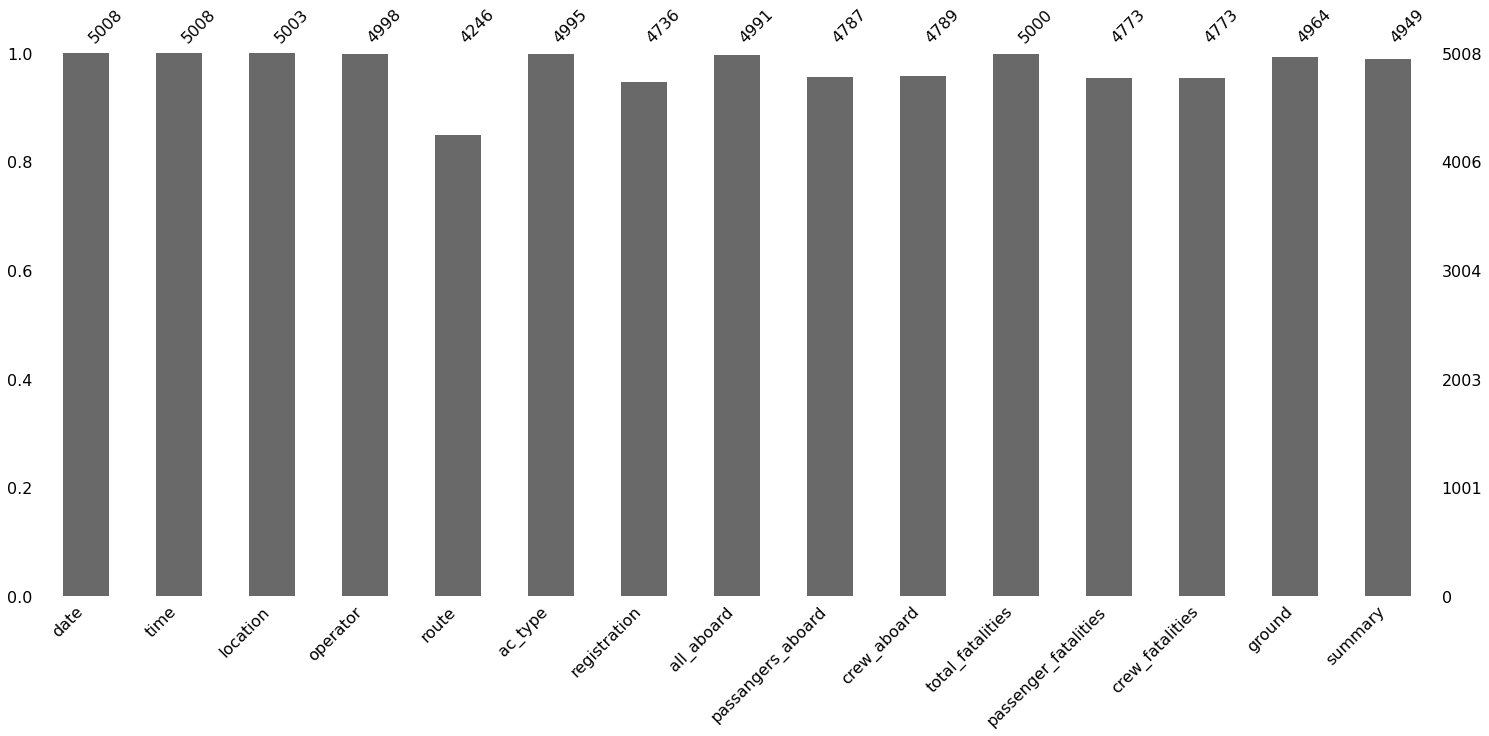

In [393]:
#importamos libreria de missingno para ver los faltantes
#[import library to see nulls in graphic]
#pip install missingno 
import missingno as msno
msno.bar(flight_accident)
plt.show()

In [396]:
flight_accident[flight_accident['all_aboard'].isna()]

,date,time,location,operator,route,ac_type,registration,all_aboard,passangers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,summary
26,21/07/1919,16:55,"Chicago, Illinois",Wingfoot Air Express Goodyear Tire,Shuttle,FD Type Dirigible,NaN,NaN,NaN,NaN,3,2,1,10,"The dirigible, cruising at 1,200 ft. caught fi..."
103,07/09/1925,00:00,"Toul, France",CIDNA,NaN,Spad 33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,10/08/1934,00:00,"Ningbo, China",China National Aviation Corporation,NaN,Sikorsky S-38B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,13/08/1935,00:00,"Hangow, China",China National Aviation Corporation,NaN,Sikorsky S-38B,NV40V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Destoryed in a storm.
451,26/12/1936,00:00,"Nanking, China",China National Aviation Corporation,NaN,Douglas DC-2,NC14269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
652,01/10/1942,00:00,"Kunming, China",China National Aviation Corporation,NaN,Douglas C-47,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crashed while attempting to land after losing ...
754,09/11/1944,00:00,"Seljord, Norway",Military - U.S. Army Air Corps,NaN,NaN,42-52196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,18/03/1946,00:00,"Between Chungking and Shanghai, China",China National Aviation Corporation,Chunking - Shanghai,NaN,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disappeared while en route. Plane never located.
1231,20/01/1951,00:00,"Huilyo, Peru",Military - TAM,NaN,Douglas DC-3,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN
1362,22/12/1952,00:00,"Damascus, Syria",Syrian Air,NaN,Douglas DC-3,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN


In [397]:
# Faltan muchos datos en todas las columnas, por lo que no es posible inferir un valor - eliminar
# [many missing value in several columns. Imposible to inffer the true value] - drop
flight_accident.dropna(subset=['passangers_aboard'], inplace=True)

In [400]:
flight_accident.shape

(4787, 15)

In [401]:
# Veamos como estan los nulos
# Let's check null % again
na_ratio = ((flight_accident.isnull().sum() / len(flight_accident))*100).sort_values(ascending = False)
print(na_ratio)

route                   12.554836
registration             3.760184
ground                   0.584917
summary                  0.543138
crew_fatalities          0.417798
passenger_fatalities     0.396908
operator                 0.146229
location                 0.104450
ac_type                  0.083560
crew_aboard              0.020890
date                     0.000000
time                     0.000000
all_aboard               0.000000
passangers_aboard        0.000000
total_fatalities         0.000000
dtype: float64


In [402]:
# Veamos que hay en 'ground'
# Take a look on 'ground'
flight_accident[flight_accident['ground'].isna()]

,date,time,location,operator,route,ac_type,registration,all_aboard,passangers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,summary
234,13/10/1930,00:00,"Perth, Australia",Wings Ltd,NaN,de Havilland DH.80 Puss Moth,VH-UPC,3,2,1,3,2,1,NaN,"Fflying over the Darling Range, aircraft went ..."
239,18/11/1930,20:00,"Techachapi Mountains, California",Pacific Air Transport,"Burbank, CA - Oakland, CA",Boeing 40,NC5340,3,0,3,3,0,3,NaN,Crashed into a mountainside at an altitude of ...
322,09/11/1933,22:35,"Portland, Oregon",United Air Lines,"Seattle, WA - Dallas, TX",Boeing 247,NC13345,10,7,3,4,3,1,NaN,Crashed in a thickly wooded area upon taking o...
324,20/11/1933,00:00,"Near Tsinan, China",China National Aviation Corporation,Canton - Shanghai,Stinson,NaN,8,7,1,8,7,1,NaN,Crashed into the Chingshan mountain range in fog.
465,20/06/1937,00:00,NaN,ENTA,San José San Isidro de El General,Travel Air 6000,TI-3,6,5,1,6,5,1,NaN,Hit trees and crashed in an isolated area loca...
481,12/11/1937,00:00,"Warsaw, Poland",LOT,Krakow - Warsaw,Lockhed 10 Electra,SP-AYD,11,9,2,4,2,2,NaN,On final approach at night and in poor visibil...
515,19/07/1938,00:00,Andes,Panagra,NaN,Douglas DC-2,NC14272,4,0,4,4,0,4,NaN,Disappeared over the Andes mountains. Wreckage...
571,20/11/1939,00:00,"Gosport, England",British Airways,Training,Airspeed Oxford,G-AFFM,2,0,2,2,0,2,NaN,Collided with the mooring of a ballon.went out...
632,19/02/1942,00:00,"Zhengzhou-Xinzheng, China",China National Aviation Corporation,NaN,Douglas DC-2,45,1,0,1,1,0,1,NaN,Crashed under unknown circumstances.
829,13/11/1945,20:15,"Near Tacloban, Philippines",Australian National Airways,NaN,Douglas C-48,VH-CDC,17,14,3,16,13,3,NaN,Crashed into the sea afte an aborted landing a...


Por lo que vemos en las descripciones, la mayoría fueron vuelos que fallaron en las montañas/lugares desconocidos. Podemos asumir que no hubo fallecidos en tierra.
[According to the description, many of these where plane that crash in remote or unknown areas, therefore, we can assume zero fatalities on ground was made]

In [403]:
# llenamos los valores con 0 para ground
# [Fill values with 0]
flight_accident['ground'] = flight_accident['ground'].fillna(0)

In [407]:
flight_accident[flight_accident['crew_fatalities'].isna()]

,date,time,location,operator,route,ac_type,registration,all_aboard,passangers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,summary
334,06/03/1934,00:00,"Petersburg, Illinois",American Airways,"St. Louis, MO - Chicago, IL",Fairchild Pilgrim 100A,NC710Y,4,3,1,4,3,NaN,0,Crashed into a snow drift due to icing in a bl...
635,03/03/1942,00:00,"Wyndham, Australia",KNILM,Java - Australia,Douglas DC-3,PK-AFV,12,8,4,8,NaN,NaN,0,Shot down by Japanese military aircraft.
947,21/02/1947,16:00,"Chungking, China",Military - Chinese Air Force,Sichang - Chungking,Douglas C-47,NaN,21,17,4,21,17,NaN,0,Crashed while attempting to land. Ran into hea...
994,11/11/1947,00:00,"Gallup, New Mexico",American Airlines,San Francisco - Chicago - New York,Douglas DC-6,NC90741,25,21,4,0,NaN,NaN,0,The aircraft was on a flight from San Francisc...
1301,02/01/1952,00:00,"Andapa, Madagascar",Air France,NaN,Junkers JU-52/3m,F-BAMQ,11,8,3,6,NaN,NaN,0,NaN
2081,04/02/1964,00:00,"Yacuiba, Bolivia",Lloyd Aéreo Boliviano,Yacuiba - La Paz,Douglas DC-3,CP- 568,29,26,3,2,NaN,NaN,0,The aircraft stalled and crashed at the end o...
2923,25/07/1977,08:00,"Near Yoro, Honduras",Military - Honduran Air Force,Yoro - Honduran,Douglas C-47,FAH-301,40,36,4,25,NaN,NaN,0,The left engine exploded in flight and the pla...
2936,21/10/1977,10:30,"Mindoro, Philippines",Military - U.S. Marine Corps,NaN,Sikorksky CH-53 (helicopter),157139,37,33,4,24,NaN,NaN,0,After lifting a water container the aircraft b...
3204,29/09/1982,19:23,"Luxembourg, Luxembourg",Aeroflot,Moscou-Luxembourg-La Havane-Lima,Ilyushin IL-62M,CCCP-86470,77,66,11,7,NaN,NaN,0,The aircraft swerved to the right after landin...
3268,16/02/1984,00:00,"Near Debre Zelt, Ethiopia",Military - Ethiopian Air Force,NaN,Antonov AN-12,1506,38,33,5,26,NaN,NaN,0,The aircraft crashed after a hijacker detonate...


In [422]:
# veamos si podemos cruzar datos
# Let's see if we can cross data
flight_accident[(flight_accident['passenger_fatalities'].isna()) & (flight_accident['crew_fatalities'].notna())]

,date,time,location,operator,route,ac_type,registration,all_aboard,passangers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,summary
628,20/01/1942,00:00,"Kupang, Indonesia",Military - Royal Australian Air Force,NaN,Lockheed Hudson,A16-79,11,7,4,11,NaN,4,0,Shortly after taking off the left engine caugh...
4770,05/07/2010,17:40,"Tuzla, Romania",Military - Romainian Air Force,Tuzla - Tuzla,Antonov AN-2,53,14,10,4,12,NaN,3,0,"The military plane, on parachuting training fl..."


In [ ]:
def fat():
    if flight_accident[(flight_accident['passenger_fatalities'].isna()) & (flight_accident['crew_fatalities'].notna())]:
        

### Conexión a la base de datos

Utilizaremos sql alchemy y lo conectaremos a una base de datos mysql

In [408]:
#importar sqlalquemy para conectar a la base de datos y pymysql para usar sentencias sql
#[import library]

import sqlalchemy as db
import pymysql

#Se prepara la conexión para la prueba. Luego hay que pasar las variables de entorno a un .env e importarlas en este .ipynb
# [prepare all conection in out .env]
from dotenv import load_dotenv
import os
load_dotenv()

database_username= os.getenv('DATABASE_USERNAME')
database_password= os.getenv('DATABASE_PASSWORD')
database_ip= os.getenv('DATABASE_IP')
database_name=os.getenv('DATABASE_NAME')

In [409]:
# Conectamos con mysql
# [Connect with MySQL]

database_conection=db.create_engine(f"mysql+pymysql://{database_username}:{database_password}@{database_ip}/{database_name}")
conect=database_conection.connect()
metadata=db.MetaData()

In [410]:
# carga del dataset limpio a SQL
# Load data (after etl) to SQL
flight_accident.to_sql(con=conect, name='accident', if_exists='append', index=False)

4787